# Ensemble Models 

1. Ensembling is about __combining__ several diverse models to generate better results.
2. Random Forest is one of the most popular and most powerful machine learning algorithms. It is a type of ensemble machine learning algorithm called Bootstrap Aggregation or bagging.


## Random Forest :
1. Special case of bagging technique.
2. Decision tree is used as the base model.
3. One of the most popular ensemble algorithms.

## Bagging Classifier :
> A Bagging classifier is an ensemble meta-estimator that fits base
classifiers each on random subsets of the original dataset and then
aggregate their individual predictions (either by voting or by averaging)
to form a final prediction. Such a meta-estimator can typically be used as
a way to reduce the variance of a black-box estimator (e.g., a decision
tree), by introducing randomization into its construction procedure and
then making an ensemble out of it.

> This algorithm encompasses several works from the literature. When random
subsets of the dataset are drawn as random subsets of the samples, then
this algorithm is known as Pasting [1]_. If samples are drawn with
replacement, then the method is known as Bagging [2]_. When random subsets
of the dataset are drawn as random subsets of the features, then the method
is known as Random Subspaces [3]_. Finally, when base estimators are built
on subsets of both samples and features, then the method is known as
Random Patches

In [20]:
#!pip install -U scikit-learn 

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')

In [22]:
data = pd.read_csv('churn_prediction_simple.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


### Separate dependent & independent variables / features.

In [23]:
# Dropping customer id cause it has no use.
X = data.drop(columns = ['customer_id','churn'])
Y = data['churn']

In [24]:
X.shape

(22067, 19)

### Scale the features.

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

### Train test split.

In [26]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(scaled_X, Y, train_size = 0.80, stratify = Y, random_state = 101)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17653, 19)
(4414, 19)
(17653,)
(4414,)


# Model Building, Bagging Logistic Regression

In [27]:
from sklearn.ensemble import BaggingClassifier as BC
classifier = BC()

classifier.fit(x_train, y_train)

BaggingClassifier()

In [28]:
# To check the parameters, cause we're going tune these for better model.
?classifier

In [29]:
from sklearn.linear_model import LogisticRegression as LR

classifier = BC(base_estimator = LR(), 
                n_estimators = 150,
                n_jobs = -1, 
                random_state = 42)

classifier.fit(x_train, y_train)
# Right now just checking parameters on train data
predicted_values = classifier.predict(x_train)

In [30]:
from sklearn.metrics import classification_report as class_repo
print(class_repo(y_train, predicted_values))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     14234
           1       0.75      0.08      0.15      3419

    accuracy                           0.82     17653
   macro avg       0.78      0.54      0.52     17653
weighted avg       0.80      0.82      0.75     17653



In [31]:
predicted_values = classifier.predict(x_test)
print(class_repo(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      3559
           1       0.78      0.09      0.16       855

    accuracy                           0.82      4414
   macro avg       0.80      0.54      0.53      4414
weighted avg       0.81      0.82      0.76      4414



### Note :
1. f1 score over the training and test set are very low. i.e 0.15 & 0.16 respectively.
2. For good results you've to do Feature selection / feature engineering. 
3. And again run above model. 

# Model Building, Random Forest

 A random forest classifier.

 A random forest is a meta estimator that fits a number of decision tree
 classifiers on various sub-samples of the dataset and uses averaging to
 improve the predictive accuracy and control over-fitting.
 The sub-sample size is controlled with the `max_samples` parameter if
 `bootstrap=True` (default), otherwise the whole dataset is used to build
 each tree.

In [33]:
from sklearn.ensemble import RandomForestClassifier as RFC
classifier = RFC()
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [35]:
predicted_values = classifier.predict(x_train)
print(class_repo(y_train, predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



In [36]:
predicted_values = classifier.predict(x_test)
print(class_repo(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      3559
           1       0.70      0.45      0.55       855

    accuracy                           0.86      4414
   macro avg       0.79      0.70      0.73      4414
weighted avg       0.84      0.86      0.84      4414



1. f1 score here is much much better on test data i.e 0.55
2. Random Forest is better than individual trees.

# Hyperparameters tuning

In [37]:
classifier = RFC()
classifier.fit(x_train, y_train)

RandomForestClassifier()

# n_estimators

In [43]:
from sklearn.metrics import f1_score
def cal_score(model, x1, y1, x2, y2):
    
    model.fit(x1,y1)
    
    predict = model.predict(x1)
    f1 = f1_score(y1, predict)
    
    predict = model.predict(x2)
    f2 = f1_score(y2, predict)
    
    return f1, f2

In [50]:
def effect(train_score, test_score, x_axis, title):
    plt.figure(figsize=(12,6), dpi = 90)
    plt.plot(x_axis, train_score, label = 'train_score', color = 'green')
    plt.plot(x_axis, test_score, label = 'test_score', color = 'lavender')
    plt.xlabel('parameter value')
    plt.ylabel('f1 score')
    plt.title(title)
    plt.grid(False)
    plt.legend()
    plt.show()

In [46]:
# to execute this, took really long time around 3 to 4 minutes, so dont worry wait till end.
estimators = [i for i in range(1,600,10)]
train = []
test = []

for i in estimators:  
  model = RFC(class_weight = 'balanced_subsample',
              n_estimators = i,
              n_jobs = -1,
              max_depth = 7,
              random_state = 101)
  f1, f2 = cal_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)

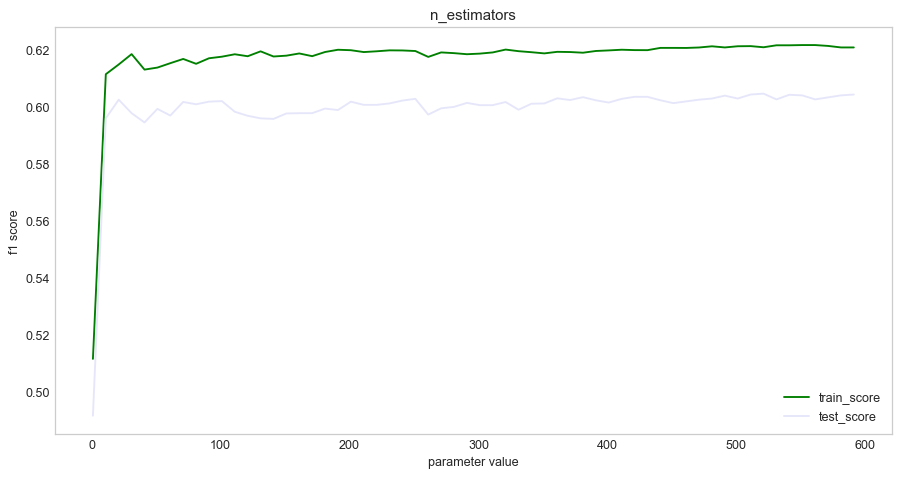

In [51]:
effect(train, test, range(1, 600, 10), 'n_estimators')

### Note :
1. From above graph we can say that performance of the train and test sharply increases at first and as the number of estimators increases the performance of the both becomes stagnated(inactive or dull) after certain level.

2. Here we can say that choosing large number of esitmators in random forest is not the best idea. This will save you from increasing computational complexity.
3. Let's check out another parameter.

# max_samples

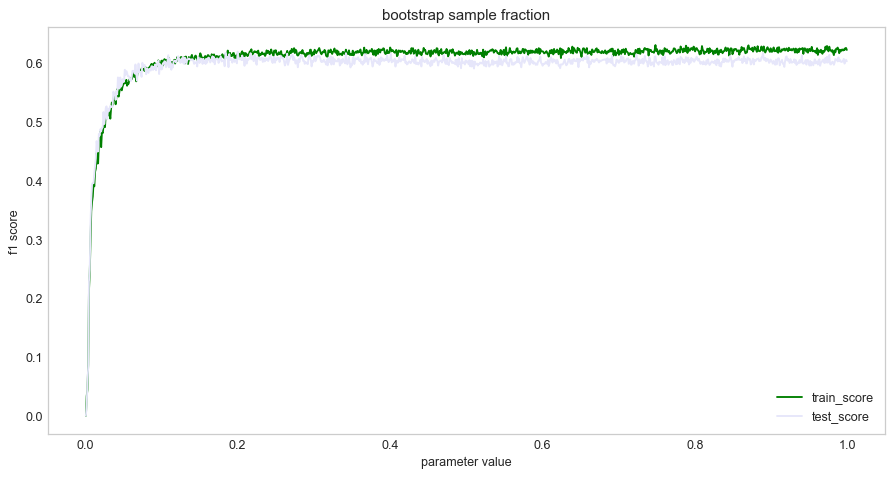

In [53]:
# This parameter takes more than 10 minutes to run. so take a nap :)
maxsamples = [i/1000 for i in range(1, 1000)]
train = []
test = []

for i in maxsamples:
    model = RFC(class_weight = 'balanced_subsample', 
                n_estimators = 50, 
                n_jobs = -1, 
                max_depth = 7, 
                random_state = 101, 
                max_samples = i)
    f1, f2 = cal_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)
    
    
effect(train, test, maxsamples , 'bootstrap sample fraction')

### Note :
1. Performance rises quickly and saturates out.
2. Perfomance reaches to the max when the data provided is only 0.2 fraction of the original dataset.

# max_features

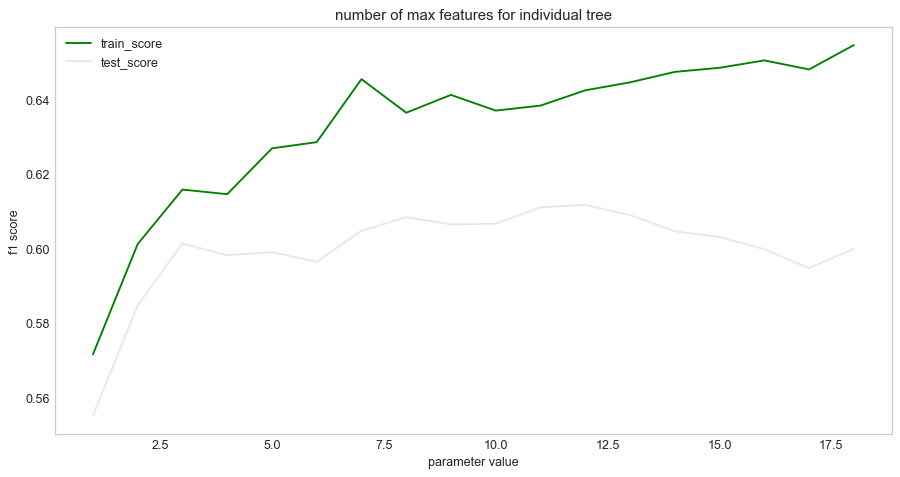

In [55]:
maxfeatures = range(1, X.shape[1])
train = []
test = []

for i in maxfeatures:  
  model = RFC(class_weight = 'balanced_subsample', n_estimators = 50,
              n_jobs = -1, max_depth = 7, random_state = 101, max_features = i)
  f1, f2 = cal_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)
    

effect(train, test, maxfeatures, 'number of max features for individual tree')